## Using Python to solve Probability and Stats Questions

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import itertools
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')


# Two Out Of Five (Easy)

 https://platform.stratascratch.com/technical/2283-two-out-of-five 

### Simulate 5 flips of a coin

In [2]:
flips_5 = list(itertools.product('HT', repeat = 5))
flips_5[:10]

[('H', 'H', 'H', 'H', 'H'),
 ('H', 'H', 'H', 'H', 'T'),
 ('H', 'H', 'H', 'T', 'H'),
 ('H', 'H', 'H', 'T', 'T'),
 ('H', 'H', 'T', 'H', 'H'),
 ('H', 'H', 'T', 'H', 'T'),
 ('H', 'H', 'T', 'T', 'H'),
 ('H', 'H', 'T', 'T', 'T'),
 ('H', 'T', 'H', 'H', 'H'),
 ('H', 'T', 'H', 'H', 'T')]

In [3]:
len(flips_5)

32

In [4]:
favorable_flips = [flip_outcome for flip_outcome in flips_5 if len(list(itertools.filterfalse(lambda x : x !='T', flip_outcome))) == 2]
favorable_flips

[('H', 'H', 'H', 'T', 'T'),
 ('H', 'H', 'T', 'H', 'T'),
 ('H', 'H', 'T', 'T', 'H'),
 ('H', 'T', 'H', 'H', 'T'),
 ('H', 'T', 'H', 'T', 'H'),
 ('H', 'T', 'T', 'H', 'H'),
 ('T', 'H', 'H', 'H', 'T'),
 ('T', 'H', 'H', 'T', 'H'),
 ('T', 'H', 'T', 'H', 'H'),
 ('T', 'T', 'H', 'H', 'H')]

In [5]:
len(favorable_flips)

10

In [6]:
prob_2T_5flips = len(favorable_flips) / len(flips_5)
prob_2T_5flips

0.3125

### Calculating with SciPy

In [7]:
stats.binom.pmf(k = 2,n = 5, p = 0.5)

0.3125

### Simulating with NumPy

In [8]:
outcomes = np.random.choice(['H', 'T'], (1000000, 5))
outcomes[:10]

array([['T', 'T', 'H', 'T', 'T'],
       ['T', 'H', 'H', 'T', 'T'],
       ['T', 'H', 'H', 'T', 'H'],
       ['H', 'T', 'T', 'T', 'H'],
       ['H', 'T', 'H', 'T', 'H'],
       ['H', 'H', 'T', 'T', 'H'],
       ['T', 'T', 'T', 'T', 'H'],
       ['T', 'T', 'T', 'T', 'H'],
       ['T', 'H', 'T', 'T', 'H'],
       ['H', 'T', 'T', 'T', 'H']], dtype='<U1')

In [9]:
fav_outcomes = [outcome for outcome in outcomes if sum(outcome == 'T') == 2]
fav_outcomes[:10]

[array(['T', 'H', 'H', 'T', 'H'], dtype='<U1'),
 array(['H', 'T', 'H', 'T', 'H'], dtype='<U1'),
 array(['H', 'H', 'T', 'T', 'H'], dtype='<U1'),
 array(['T', 'H', 'T', 'H', 'H'], dtype='<U1'),
 array(['H', 'T', 'T', 'H', 'H'], dtype='<U1'),
 array(['H', 'H', 'T', 'H', 'T'], dtype='<U1'),
 array(['H', 'T', 'H', 'H', 'T'], dtype='<U1'),
 array(['H', 'T', 'H', 'H', 'T'], dtype='<U1'),
 array(['H', 'T', 'H', 'H', 'T'], dtype='<U1'),
 array(['H', 'T', 'H', 'T', 'H'], dtype='<U1')]

In [10]:
len(fav_outcomes) / len(outcomes)

0.311937

**The empirical Probability matches the Analytical one**

### Simulating all possible cases with 5 flips of a coin

In [11]:
all_scenarios = [len([outcome for outcome in outcomes if sum(outcome == 'T') == i]) for i in range(6)]
all_scenarios

[31206, 156329, 311937, 312455, 156760, 31313]

In [12]:
all_probs = [scenario / len(outcomes) for scenario in all_scenarios]
all_probs

[0.031206, 0.156329, 0.311937, 0.312455, 0.15676, 0.031313]

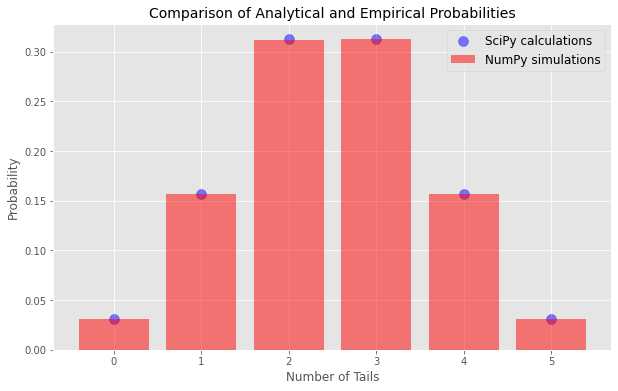

In [13]:
plt.figure(figsize = (10,6))
plt.bar(x = np.arange(6), height = all_probs, color = 'Red',
        alpha = 0.5, label = 'NumPy simulations')
plt.scatter(np.arange(6), stats.binom.pmf(np.arange(6),n = 5, p = 0.5), marker = 'o',
            s = 100, color = 'Blue', alpha = 0.5, label = 'SciPy calculations')
plt.legend(fontsize = 12)
plt.xlabel('Number of Tails', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.title("Comparison of Analytical and Empirical Probabilities", fontsize = 14)
plt.show()

## Different Card (Medium)

https://platform.stratascratch.com/technical/2001-different-card

### Create the card deck

In [14]:
suits = ['S', 'C', 'D', 'H']
ranks = [2, 3 ,4, 5, 6, 7, 8, 9 , 'T', 'J', 'Q', 'K' , 'A']
cards = [str(rank) + suit for suit in suits for rank in ranks]
cards[:20]

['2S',
 '3S',
 '4S',
 '5S',
 '6S',
 '7S',
 '8S',
 '9S',
 'TS',
 'JS',
 'QS',
 'KS',
 'AS',
 '2C',
 '3C',
 '4C',
 '5C',
 '6C',
 '7C',
 '8C']

In [15]:
len(cards)

52

### Calculate All Possible Cases

In [16]:
outcomes = list(itertools.permutations(cards, 2))
len(outcomes)

2652

### Unfavorable Cases

In [17]:
unfavorable_cases = len(list(itertools.permutations(suits, 1))) * len(list(itertools.permutations(ranks, 2)))
unfavorable_cases

624

In [18]:
probability = 1 - unfavorable_cases / len(outcomes)
probability

0.7647058823529411

### Simulating with NumPy

In [19]:
any_two_cards = np.random.choice(cards, (1000000,2))
any_two_cards[:10]

array([['QC', '3D'],
       ['5C', 'JS'],
       ['3H', 'AH'],
       ['KS', '6C'],
       ['7S', '5C'],
       ['KC', 'KS'],
       ['4S', '3D'],
       ['4S', 'TD'],
       ['5H', '8D'],
       ['5C', '8S']], dtype='<U2')

In [20]:
unfavorable_cases = [selection for selection in any_two_cards if (selection[0][-1] == selection[-1][-1]) ]
unfavorable_cases[:10]

[array(['3H', 'AH'], dtype='<U2'),
 array(['TC', '5C'], dtype='<U2'),
 array(['QH', '6H'], dtype='<U2'),
 array(['9C', 'TC'], dtype='<U2'),
 array(['4S', '8S'], dtype='<U2'),
 array(['8D', '9D'], dtype='<U2'),
 array(['7C', '7C'], dtype='<U2'),
 array(['9D', 'AD'], dtype='<U2'),
 array(['QD', 'QD'], dtype='<U2'),
 array(['AD', '8D'], dtype='<U2')]

In [21]:
emp_probability = 1 - (len(unfavorable_cases) / len(any_two_cards))
emp_probability

0.749957

**The empirical probability is close to the analytical probability**

## Dice with 12 Faces (Hard)

https://platform.stratascratch.com/technical/2280-dice-with-12-faces

### Simulate 1 million rolls of the biased die

In [22]:
outcomes = np.random.choice(np.arange(1,13), size = 1000000, p = np.array([0.6/11] * 11 + [0.4]))

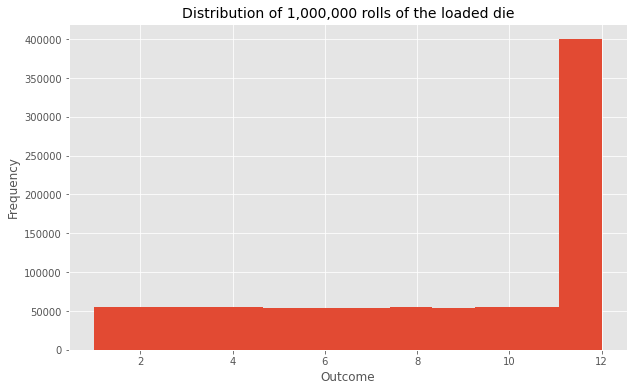

In [23]:
plt.figure(figsize = (10,6))
plt.hist(outcomes, bins = 12)
plt.xlabel("Outcome", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Distribution of 1,000,000 rolls of the loaded die", fontsize = 14)
plt.show()

### Calculate wins and losses for each scenario

In [24]:
choices = list(itertools.permutations(np.arange(1,13), 2))
results = []
for choice in choices:
    wins = (abs(outcomes - choice[0] ) < abs(outcomes - choice[1] )).sum()
    losses = (abs(outcomes - choice[0] ) > abs(outcomes - choice[1] )).sum()
    ties =  (abs(outcomes - choice[0] ) == abs(outcomes - choice[1] )).sum()
    results.append([choice[0], choice[1], wins, losses, ties])
    
results_df = pd.DataFrame(results, columns = ['my_choice', 'opp_choice', 'wins', 'losses', 'ties'])
results_df['better_choice'] = results_df['wins'] > results_df['losses']
results_df

,my_choice,opp_choice,wins,losses,ties,better_choice
0,1,2,54639,945361,0,False
1,1,3,54639,890771,54590,False
2,1,4,109229,890771,0,False
3,1,5,109229,836294,54477,False
4,1,6,163706,836294,0,False
...,...,...,...,...,...,...
127,12,7,509975,490025,0,True
128,12,8,455159,490025,54816,False
129,12,9,455159,544841,0,False
130,12,10,400008,544841,55151,False


In [25]:
summ_df = results_df[['my_choice', 'wins', 'losses', 'ties', 'better_choice']].groupby(by = ['my_choice']).sum()
summ_df

,wins,losses,ties,better_choice
my_choice,,,,
1,1964311,8763369,272320,0
2,3127353,7600603,272044,1
3,4126349,6601494,272157,2
4,4962027,5766030,271943,3
5,5633747,5094143,272110,4
6,6142136,4585727,272137,5
7,6488031,4239964,272005,6
8,6671289,4056713,271998,8
9,6691291,4036427,272282,10


**The best choices for us and our opponent are 10 and 9 respectively**